In [8]:
%load_ext autoreload
%autoreload 2

In [9]:
import torch
import numpy as np
import pickle
import matplotlib.pyplot as plt

with open('data/test0_filtered/rb15_08_15-16_28_set_0.p', 'rb') as f:
    bag = pickle.load(f)

In [292]:
import polyfit

model = polyfit.PolyMLP()
torch_dict = torch.load('models/polyfitmlp.p')

model.load_state_dict(torch_dict['model_state_dict'])

<All keys matched successfully>

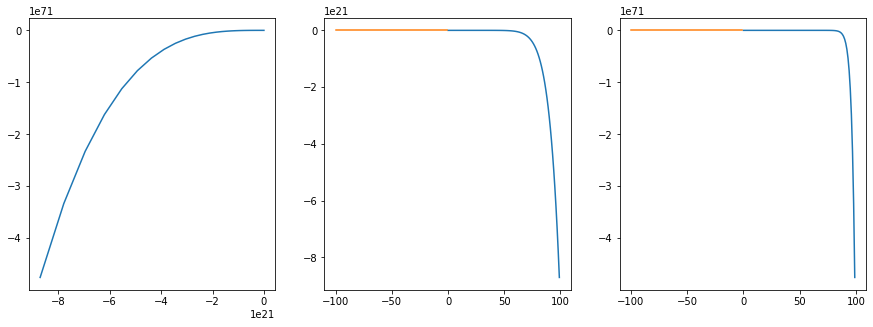

In [308]:
from IPython.display import display, clear_output

polyset = polyfit.PolyDataset(bag)

i = np.random.randint(len(polyset))
x, y = polyset[i]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sxp = np.poly1d(y[:12])
syp = np.poly1d(y[12:])
t = np.linspace(0, 99, 100)
p_x = sxp(t)
p_y = syp(t)

sxpp = np.poly1d(y_pred[:12])
sypp = np.poly1d(y_pred[12:])

pt = np.linspace(-100, -1, 100)

x = x.reshape(-1, 6)
ax[0].plot(p_x, p_y)
ax[0].plot(x[:, 0], x[:, 1])

ax[1].plot(t, p_x)
ax[1].plot(pt, x[:, 0])

ax[2].plot(t, p_y)
ax[2].plot(pt, x[:, 1])

In [10]:
import os

bags = []
for fp in os.listdir('data/putnam/'):
    if fp.endswith('.p'):
        with open(f'data/putnam/{fp}', 'rb') as f:
            bags.append(pickle.load(f))

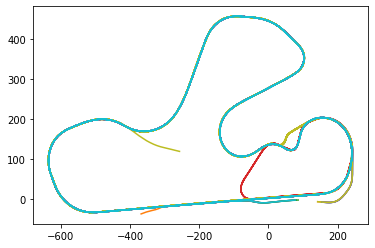

213583


In [382]:
fig, ax = plt.subplots()

t = 0
for b in bags:
    p = np.array(b['p'])
    t += p.shape[0]
    ax.plot(p[:, 0], p[:, 1])
    plt.show()
    display(fig)
    plt.pause(1)
    print(t)
    clear_output(wait=True)

In [390]:
x_min = -680.7353559692199
y_min = -61.53660840347962

In [386]:
def find_disc_point_func_gen(min_x, min_y, interval=.1):
        return int((x - min_x) / interval), int((y - min_y) / interval)
    return find_disc_point

In [424]:
fdp = find_disc_point_func_gen(x_min, y_min, interval=20)

def unique_points(bags): 
    s = dict()
    for b in bags:
        for x, y, _ in b['p']:
            up = fdp(x, y)
            if up not in s:
                s[up] = 0
            s[up] += 1
    return s

disc_points = unique_points(bags)

In [425]:
len(disc_points)

219

In [48]:
import datasets

ds = datasets.ContDataset(bags[0])

x, y = ds[0]

Standardization factors for u are not set. Continuing with unstandardized values.
Normalization values for p are not set. Continuing with unnormalized values.
(100, 3)
